# Data Exploration and Cleanup

In [114]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
# import seaborn as sns
import os
import datetime
from pprint import pprint
# import plotly.express as px


In [116]:
parent_folder = 'historical_data'
csv_list = [f for f in os.listdir(parent_folder) if '.csv' in f]
df_list = []
for csv in csv_list:
    df = pd.read_csv(os.path.join(parent_folder, csv))
    df_list.append(df)
master_df = pd.concat(df_list, ignore_index=True)

In [117]:
master_df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [120]:
# Display an overview of the Specie column
master_df["Specie"].unique()

array(['co', 'pm10', 'o3', 'so2', 'no2', 'pm25', 'psi', 'uvi', 'neph',
       'aqi', 'mepaqi', 'pol', 'temperature', 'humidity', 'pressure',
       'wd', 'wind-speed', 'd', 'pm1', 'wind-gust', 'precipitation',
       'dew', 'wind speed', 'wind gust'], dtype=object)

In [121]:
# Display an overview of the number of rows each Specie has in the dataframe
master_df["Specie"].value_counts()

no2              757103
pm25             751747
pm10             739799
o3               719427
so2              630605
co               577117
temperature      563323
humidity         563167
pressure         560354
wind-speed       508685
dew              407564
wind-gust        312681
precipitation     55443
wind speed        49751
wd                47936
wind gust         31765
aqi               25188
uvi               17841
pol                4958
pm1                2973
neph               2321
d                  2031
mepaqi             1690
psi                 363
Name: Specie, dtype: int64

In [122]:
species_to_remove = ["temperature", "humidity", "pressure", "wind-speed", "dew", "wind-gust",
                     "wind speed", "wind gust", "precipitation", "wd", "aqi", "uvi", "pol", "pm1", "mepaqi", "neph"]

short_airdf = master_df[~master_df["Specie"].isin(species_to_remove)].reset_index(drop=True).copy()

In [123]:
short_airdf.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,6/01/2015,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,22/01/2015,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,30/03/2015,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,27/05/2015,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,3/02/2015,KR,Jeonju,co,133,4.5,13.4,7.8,39.24


In [124]:
# Overview of the remaining air pollutant species in focus
short_airdf["Specie"].value_counts()

no2     757103
pm25    751747
pm10    739799
o3      719427
so2     630605
co      577117
d         2031
psi        363
Name: Specie, dtype: int64

In [125]:
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178192 entries, 0 to 4178191
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   Date      object 
 1   Country   object 
 2   City      object 
 3   Specie    object 
 4   count     int64  
 5   min       float64
 6   max       float64
 7   median    float64
 8   variance  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 286.9+ MB


In [128]:
short_airdf["Date"] = pd.to_datetime(short_airdf["Date"],infer_datetime_format=True)


,Date,Country,City,Specie,count,min,max,median,variance
0,2015-06-01,KR,Jeonju,co,124,0.1,12.3,4.5,55.74
1,2015-01-22,KR,Jeonju,co,116,4.5,10.0,6.7,16.09
2,2015-03-30,KR,Jeonju,co,118,1.2,11.2,5.6,35.98
3,2015-05-27,KR,Jeonju,co,93,2.3,5.6,3.4,6.54
4,2015-03-02,KR,Jeonju,co,133,4.5,13.4,7.8,39.24
...,...,...,...,...,...,...,...,...,...
4178187,2020-12-31,PL,Kraków,o3,144,1.7,8.1,4.6,28.32
4178188,2021-01-03,PL,Kraków,o3,144,0.5,7.1,2.1,30.05
4178189,2020-10-12,PL,Kraków,o3,144,4.6,16.0,12.7,81.38
4178190,2020-10-16,PL,Kraków,o3,144,1.2,5.9,3.5,18.86


In [129]:
# Double check the Date data type
short_airdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4178192 entries, 0 to 4178191
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   Date      datetime64[ns]
 1   Country   object        
 2   City      object        
 3   Specie    object        
 4   count     int64         
 5   min       float64       
 6   max       float64       
 7   median    float64       
 8   variance  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(3)
memory usage: 286.9+ MB


In [130]:
# Find the earliest date the air quality dataset covers:
short_airdf["Date"].min()

Timestamp('2014-12-29 00:00:00')

In [131]:
# Find the latest date the air quality dataset covers:
short_airdf["Date"].max()

Timestamp('2021-12-06 00:00:00')

In [132]:
# Because we only focus on air data from 2019 to 2020H1, we'll remove the few data points on 2018-12-31 and the first days of July 2020.
clean_airdf = short_airdf[(short_airdf["Date"] >= pd.to_datetime("2019-01-01")) & (short_airdf["Date"] <= pd.to_datetime("2020-07-01"))].copy()
clean_airdf

,Date,Country,City,Specie,count,min,max,median,variance
1647731,2019-01-16,AE,Abu Dhabi,pm10,24,86.0,99.0,97.0,179.40
1647732,2019-01-22,AE,Abu Dhabi,pm10,24,51.0,57.0,55.0,23.75
1647733,2019-01-26,AE,Abu Dhabi,pm10,24,136.0,173.0,160.0,941.96
1647734,2019-07-01,AE,Abu Dhabi,pm10,24,60.0,91.0,72.0,1006.88
1647735,2019-10-01,AE,Abu Dhabi,pm10,24,82.0,93.0,87.0,57.97
...,...,...,...,...,...,...,...,...,...
3913826,2020-06-29,SK,Bratislava,pm25,70,5.0,107.0,38.0,4019.33
3913829,2020-07-01,SK,Bratislava,pm25,96,5.0,104.0,55.0,6569.41
3913837,2020-07-01,SK,Bratislava,no2,93,1.0,27.9,6.0,502.39
3913853,2020-06-30,SK,Bratislava,no2,95,1.4,24.3,6.4,495.58


In [137]:
# Set the starting date for the air quality analysis
starting_date = clean_airdf["Date"].min()
starting_date

Timestamp('2019-01-01 00:00:00')

In [138]:
# Set the cutoff date for the air quality analysis
end_date = clean_airdf["Date"].max()
end_date

Timestamp('2020-07-01 00:00:00')

In [140]:
# Display an overview of the Country column
clean_airdf["Country"].unique()

array(['AE', 'CZ', 'SG', 'AT', 'BE', 'KR', 'MN', 'NO', 'NP', 'PE', 'BA',
       'BR', 'IL', 'IN', 'IR', 'NZ', 'UA', 'US', 'FR', 'KW', 'RE', 'TR',
       'XK', 'UZ', 'FI', 'JP', 'KZ', 'RO', 'RU', 'SK', 'ES', 'HK', 'HR',
       'TH', 'LK', 'AR', 'CA', 'CH', 'CL', 'ET', 'KG', 'CW', 'DE', 'MX',
       'SA', 'UG', 'BD', 'HU', 'IS', 'PH', 'ID', 'MO', 'SE', 'SV', 'VN',
       'AU', 'BH', 'GB', 'IE', 'LA', 'LT', 'PR', 'PT', 'TW', 'CN', 'PL',
       'BG', 'CY', 'IQ', 'MK', 'BO', 'DK', 'EC', 'ZA', 'CO', 'EE', 'IT',
       'JO', 'NL', 'RS', 'PK', 'TJ', 'MM', 'DZ', 'TM', 'AF', 'GR', 'ML',
       'GE', 'GT', 'CR', 'GN', 'CI', 'GH'], dtype=object)

In [141]:
clean_airdf["Country"].nunique()

94

In [142]:
# Display an overview of the City column
clean_airdf["City"].unique()

array(['Abu Dhabi', 'Dubai', 'Prague', 'Ostrava', 'Brno', 'Pilsen',
       'Olomouc', 'Singapore', 'Salzburg', 'Linz', 'Innsbruck', 'Vienna',
       'Graz', 'Liège', 'Brussels', 'Charleroi', 'Gent', 'Namur',
       'Antwerpen', 'Jeonju', 'Seoul', 'Busan', 'Sejong', 'Ulsan',
       'Yeosu', 'Gwangju', 'Seongnam-si', 'Daejeon', 'Pohang', 'Changwon',
       'Suwon', 'Cheongju-si', 'Chuncheon', 'Daegu', 'Jeju City',
       'Incheon', 'Suncheon', 'Mokpo', 'Andong', 'Ulan Bator',
       'Trondheim', 'Oslo', 'Stavanger', 'Bergen', 'Kathmandu', 'Pokhara',
       'Lima', 'Sarajevo', 'Zenica', 'Tuzla', 'São José dos Campos',
       'São Paulo', 'Tel Aviv', 'Haifa', 'Jerusalem', 'Ashdod', 'Netanya',
       'Ashkelon', 'Petaẖ Tiqwa', 'New Delhi', 'Hyderabad', 'Delhi',
       'Chandigarh', 'Bhopal', 'Lucknow', 'Ghāziābād', 'Hāpur',
       'Gandhinagar', 'Chennai', 'Nashik', 'Visakhapatnam', 'Mumbai',
       'Jaipur', 'Patna', 'Muzaffarnagar', 'Thiruvananthapuram',
       'Bengaluru', 'Kolkata', 'Is

In [143]:
clean_airdf["City"].nunique()

602

In [144]:
clean_airdf.loc[clean_airdf["Country"] == "AU", "City"].value_counts()

Sydney        3405
Brisbane      3390
Melbourne     3326
Wollongong    3293
Darwin        3250
Adelaide      3158
Perth         3120
Newcastle     2897
Hobart        1138
Launceston    1138
Canberra      1131
Name: City, dtype: int64

In [72]:
 # #compare 5 cities Pairs, Brooklyn, Wu Han, Melbourne, New Delhi

In [188]:
#import data 2021 first half

a19_df = short_airdf[(short_airdf["Date"] >= "2019-01-01") & (short_airdf["Date"] <= "2019-12-31")].copy()
a20_df = short_airdf[(short_airdf["Date"] >= "2020-01-01") & (short_airdf["Date"] <= "2020-12-31")].copy()



In [189]:

paris19_df=a19_df[(a19_df['City']=='Paris')]
wuhan19_df=a19_df[(a19_df['City']=='Wuhan')]
brooklyn19_df=a19_df[(a19_df['City']=='Brooklyn')]
melbourne19_df=a19_df[(a19_df['City']=='Melbourne')]
newdelhi19_df=a19_df[(a19_df['City']=='New Delhi')]


paris20_df=a20_df[(a20_df['City']=='Paris')]
wuhan20_df=a20_df[(a20_df['City']=='Wuhan')]
brooklyn20_df=a20_df[(a20_df['City']=='Brooklyn')]
melbourne20_df=a20_df[(a20_df['City']=='Melbourne')]
newdelhi20_df=a20_df[(a20_df['City']=='New Delhi')]


In [234]:
# new delhi comparison
pm25d_19=newdelhi19_df[newdelhi19_df['Specie']=='pm25'].sort_values(by='Date')
pm25d_20=newdelhi20_df[newdelhi20_df['Specie']=='pm25'].sort_values(by='Date')



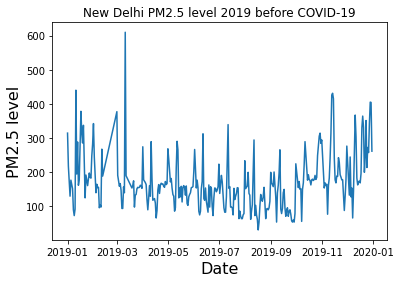

In [235]:
# pm25 2019

plt.plot(pm25d_19['Date'],pm25d_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('New Delhi PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/Newdelhipm25_2019.png")

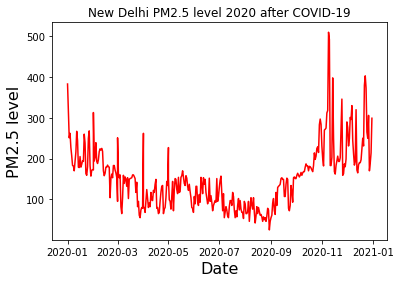

In [236]:
# pm25 2020

plt.plot(pm25d_20['Date'],pm25d_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('New Delhi PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/newdelhipm25_2020.png")

In [209]:
# paris comparison
pm25p_19=paris19_df[paris19_df['Specie']=='pm25'].sort_values(by='Date')
pm25p_20=paris20_df[paris20_df['Specie']=='pm25'].sort_values(by='Date')


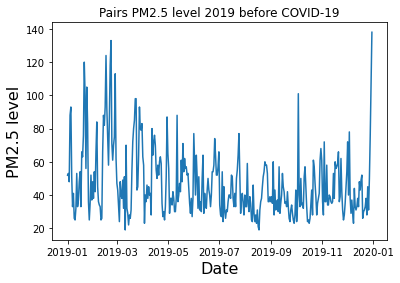

In [210]:
# pm25 2019

plt.plot(pm25p_19['Date'],pm25p_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Pairs PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/parispm252019.png")

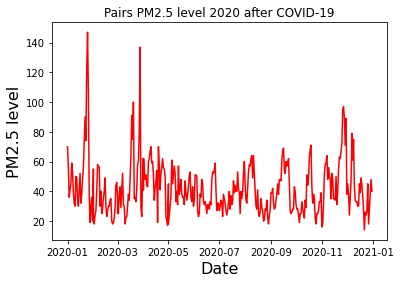

In [211]:
# pm25 2020
plt.plot(pm25p_20['Date'],pm25p_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Pairs PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/parispm25_2020.png")

In [212]:
# wuhan comparison
pm25w_19=wuhan19_df[wuhan19_df['Specie']=='pm25'].sort_values(by='Date')

pm25w_20=wuhan20_df[wuhan20_df['Specie']=='pm25'].sort_values(by='Date')


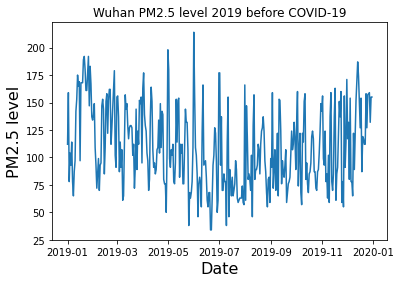

In [213]:
# pm25 2019
plt.plot(pm25w_19['Date'],pm25w_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Wuhan PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/wuhanpm25_2019.png")

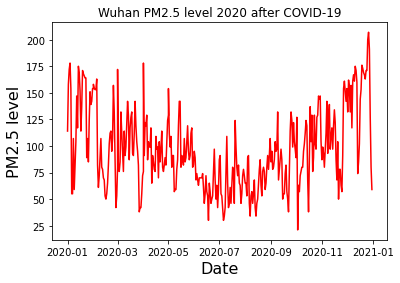

In [214]:
# pm25 2020
plt.plot(pm25w_20['Date'],pm25w_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Wuhan PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/wuhanpm25_2020.png")

In [215]:
# Melbourne comparison
pm25m_19=melbourne19_df[melbourne19_df['Specie']=='pm25'].sort_values(by='Date')
pm25m_20=melbourne20_df[melbourne20_df['Specie']=='pm25'].sort_values(by='Date')

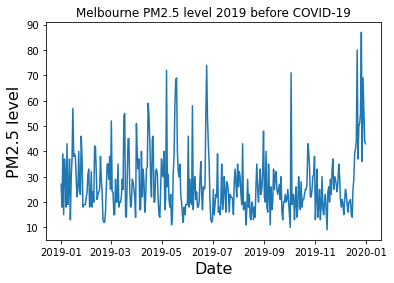

In [224]:
# pm25 2019
plt.plot(pm25m_19['Date'],pm25m_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Melbourne PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/melbournepm25_2019.png")

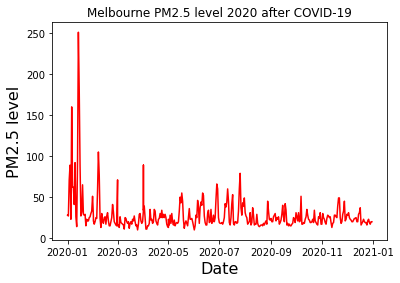

In [225]:
# pm25 2020
plt.plot(pm25m_20['Date'],pm25m_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Melbourne PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/melbournepm252020.png")

In [218]:
# Brooklyn comparison
pm25b_19=brooklyn19_df[brooklyn19_df['Specie']=='pm25'].sort_values(by='Date')
pm25b_20=brooklyn20_df[brooklyn20_df['Specie']=='pm25'].sort_values(by='Date')

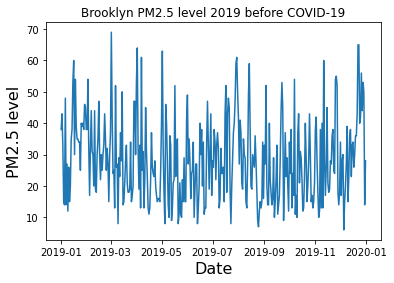

In [226]:
# pm25 2019
plt.plot(pm25b_19['Date'],pm25b_19['median'])
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Brooklyn PM2.5 level 2019 before COVID-19')
plt.savefig(f"images/brooklynpm25_2019.png")

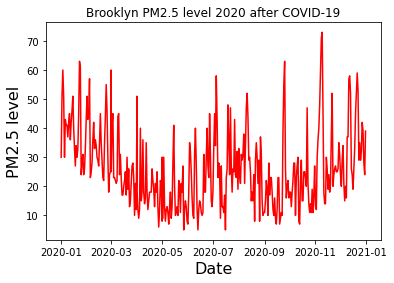

In [227]:
# pm25 2020
plt.plot(pm25b_20['Date'],pm25b_20['median'],color='red')
plt.xlabel("Date", fontsize=16)
plt.ylabel('PM2.5 level', fontsize=16)
plt.title('Brooklyn PM2.5 level 2020 after COVID-19')
plt.savefig(f"images/brooklynpm25_2020.png")

In [238]:
summary_pm25comparison=pd.DataFrame({"Cities":["New Delhi", "Paris","Wuhan", "Melbourne", "Brooklyn"],
                                    "2019 Before Covid":[pm25d_19['median'].median(),pm25p_19['median'].median(),pm25w_19['median'].median(),pm25m_19['median'].median(),pm25b_19['median'].median()],
                                    "2020 After Covid":[pm25d_20['median'].median(),pm25p_20['median'].median(),pm25w_20['median'].median(),pm25m_20['median'].median(),pm25b_20['median'].median()]})
summary_pm25comparison.to_csv("output_csv/PM25_comparison.csv")
summary_pm25comparison

,Cities,2019 Before Covid,2020 After Covid
0,New Delhi,155.0,151.0
1,Paris,40.0,38.0
2,Wuhan,105.5,89.0
3,Melbourne,24.0,23.0
4,Brooklyn,27.0,24.0
